In [1]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import os
import shutil
import re
import seaborn as sns
from pathlib import Path

C:\Users\Rudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
os.listdir(os.path.join(os.getcwd(),"testdir"))

['models', 'test', 'train', 'valid']

In [3]:
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    remain = list(set(full_set)-set(train))

    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [4]:
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## creating destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('data',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    move_files(test_source_files,"data/test")

In [5]:
## confirming path for the images
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data')

In [6]:
trash = ImageDataBunch.from_folder(path,test="test",bs=16)

In [7]:
trash

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data;

Valid: LabelList (629 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data

In [8]:
print(trash.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


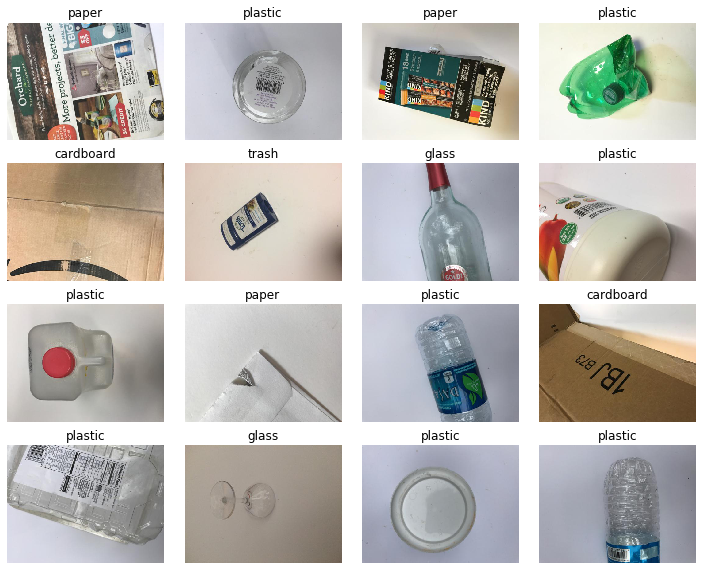

In [9]:
#showing pictures as a test
trash.show_batch(rows=4,figsize=(10,8))

In [10]:
learn = cnn_learner(trash,models.resnet34,metrics=error_rate)

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


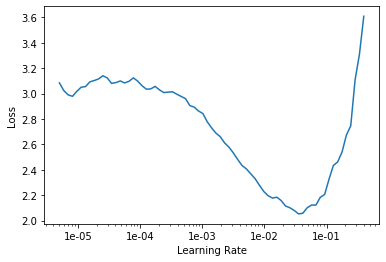

In [12]:
#showing learning rate

learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

In [13]:
#running epochs
learn.fit_one_cycle(20,max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.542050,0.595057,0.208267,00:59
1,0.883315,0.431544,0.149444,00:58
2,0.649446,0.598005,0.163752,00:57
3,0.738086,0.791997,0.232114,00:58
4,0.634270,0.662180,0.206677,00:58
5,0.596360,0.713143,0.190779,00:59
6,0.597092,1.371446,0.289348,01:01
7,0.585368,0.719813,0.198728,00:56
8,0.484227,0.701031,0.192369,00:56
9,0.470001,0.592915,0.158983,00:56


In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [15]:
#using torch + tensor to get the highest error pictures
torch.Tensor.ndim = property(lambda x: len(x.size()))

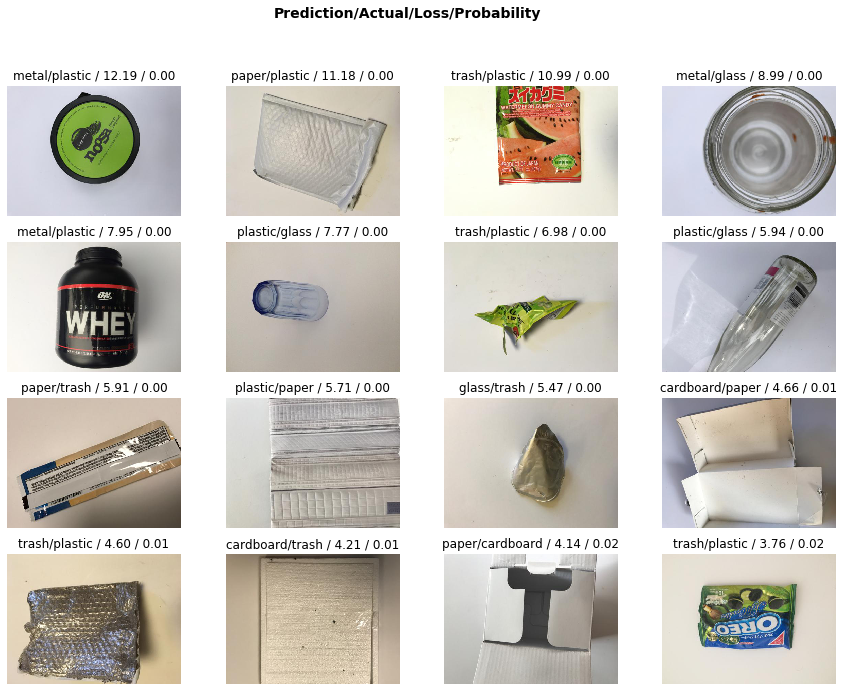

In [16]:
#shows the top 16 images that were identified incorrectly along with their statistics
interp.plot_top_losses(16, figsize=(15,11))

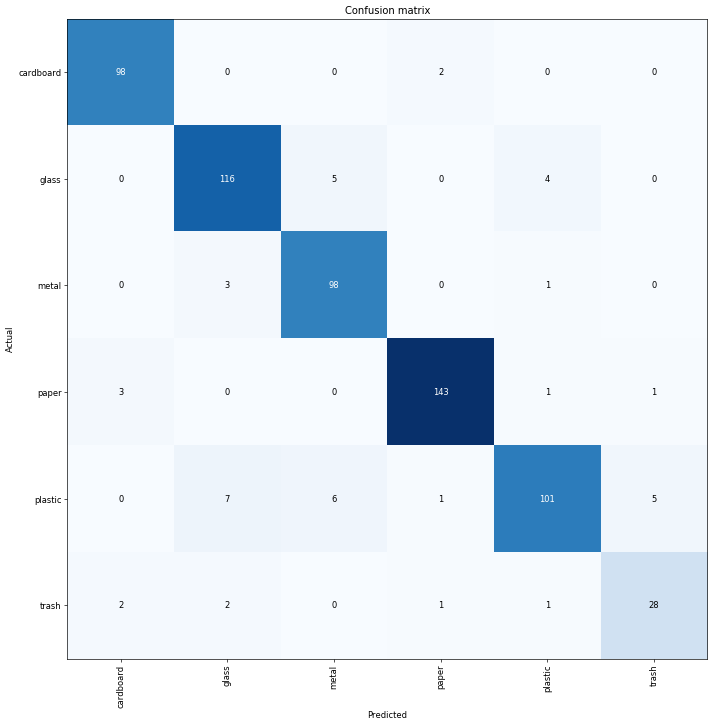

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , alpha : float = 0.6 , cmap : str = 'magma' , show_text : bool = True , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

In [17]:
#confusion matrix shows that glass was confused for metal the most
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)


[('plastic', 'glass', 7),
 ('plastic', 'metal', 6),
 ('glass', 'metal', 5),
 ('plastic', 'trash', 5),
 ('glass', 'plastic', 4),
 ('metal', 'glass', 3),
 ('paper', 'cardboard', 3),
 ('cardboard', 'paper', 2),
 ('trash', 'cardboard', 2),
 ('trash', 'glass', 2)]

In [19]:
#trying to get a higher accuracy rate!
#learner.predict() only predicts on a single image, while learner.get_preds() 
#predicts on a set of images.
preds = learn.get_preds(ds_type=DatasetType.Test)

In [20]:
print(preds[0].shape)
preds[0]

torch.Size([635, 6])


tensor([[9.9998e-01, 1.3907e-06, 1.1630e-05, 2.4503e-06, 1.2557e-07, 3.5286e-08],
        [9.9956e-01, 9.9907e-08, 3.5397e-08, 1.8251e-05, 1.1902e-05, 4.1384e-04],
        [9.9506e-01, 1.5844e-05, 3.7192e-03, 2.2776e-05, 1.1329e-03, 4.9901e-05],
        ...,
        [2.2557e-04, 5.0127e-05, 1.1065e-07, 2.0109e-01, 1.9563e-04, 7.9844e-01],
        [8.9931e-09, 1.1082e-09, 2.0838e-10, 1.8990e-03, 1.0627e-07, 9.9810e-01],
        [1.5500e-01, 4.8891e-03, 2.0359e-02, 1.4611e-01, 4.8654e-02, 6.2498e-01]])

In [21]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [22]:
yhat = []
for max_idx in max_idxs:
    yhat.append(trash.classes[max_idx])

In [23]:
yhat

['cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'metal',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboar

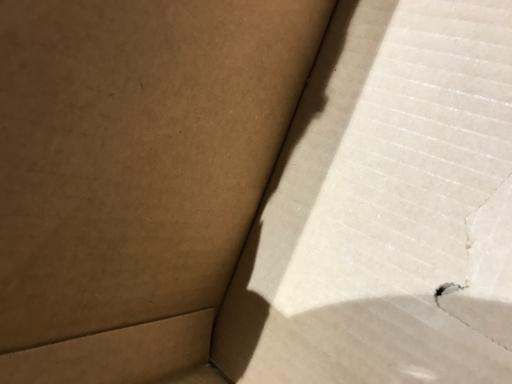

In [24]:
learn.data.test_ds[0][0]

In [27]:
y = []

for label_path in trash.test_ds.items:
    y.append(str(label_path))
    
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [28]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

#only one was wrong in this set

['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard']
['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard']


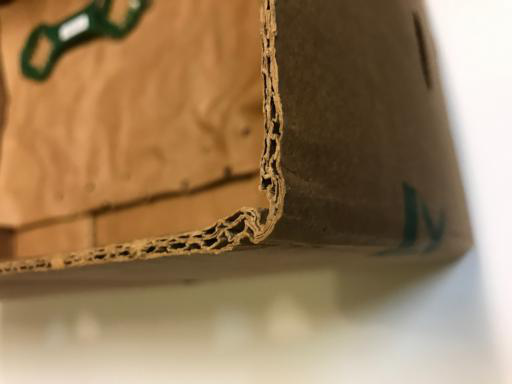

In [29]:
learn.data.test_ds[4][0]
#this is the picture that was predicted wrong by the machine (metal vs cardboard)

In [30]:
cm = confusion_matrix(y,yhat)
print(cm)

[[ 99   0   1   1   0   0]
 [  1 109   8   1   7   0]
 [  0   6  94   0   2   1]
 [  1   0   0 146   2   0]
 [  0   8   1   1 109   2]
 [  1   0   0   1   5  28]]


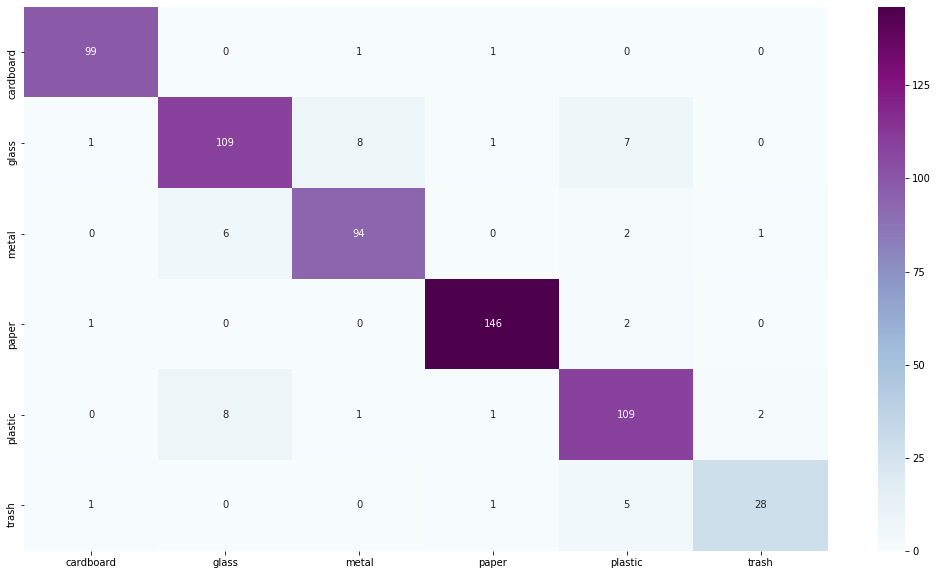

In [31]:
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(18,10))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="BuPu")
plt.autoscale()
#used seaborn heatmaps library to make it pretty
#need to fix this because it's cut off but it shows most of the data
#edit: fixed with plt.autoscale!

In [32]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]
            
#accuracy equation! assigning correct to how much the machine got right

In [33]:
#putting correct into the accuracy equation divided by the total amount
accuracy = correct/sum(sum(cm))
accuracy

0.9212598425196851

In [ ]:
#HUGE credits to https://medium.com/ml-and-automation/deep-learning-a-step-by-step-guide-using-fastai-9a5c55f9e4ce
#referenced this page so much
#dataset was sourced from kaggle 
#https://www.kaggle.com/asdasdasasdas/garbage-classification